<a href="https://colab.research.google.com/github/Nikhil5566/Data-Science-Portfolio-Projects/blob/main/Global_Corn_Supply_%26_Demand_Master_(1975_2026)_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Corn Supply & Demand Master (1975-2026) Dataset

# Introduction & Key Insights

---

### The Pulse of Global Agriculture: Deciphering the Corn Supply & Demand Dataset (1975–2026)

**The Dataset Overview**
This project analyzes a half-century of agricultural history, spanning from 1975 to the forecasted horizon of 2026. The dataset serves as a comprehensive ledger of the global corn market, tracking critical metrics including **Total Production**, **Domestic Consumption**, **Import/Export Trade Flows**, and **Ending Stocks**. Unlike static datasets, this is a dynamic Time Series record that captures the evolution of modern agriculture, reflecting the impact of technological advancements, geopolitical shifts, and changing global dietary habits.

**Key Insights & Feature Engineering**
The raw data reveals a clear, upward trend in global corn production, driven largely by improvements in yield technology rather than just acreage expansion. However, our analysis went beyond simple volume tracking to uncover the "physics" of the market:

1. **The "Golden Ratio" of Scarcity:**
Through feature engineering, we calculated the **Stocks-to-Use Ratio**, arguably the most critical metric in agricultural economics. Our analysis proves that raw production numbers are often misleading; prices and market stability are determined not by how much corn is grown, but by how much is left over relative to consumption. A low ratio signals imminent price spikes, regardless of record-breaking harvest numbers.
2. **Market Memory (Autocorrelation):**
Statistical testing (ADF and ACF plots) confirmed that the corn market has a "long memory." High production in one year strongly correlates with high production the next, due to the sticky nature of agricultural technology and infrastructure. However, the data also highlights distinct "shock years"—likely driven by weather anomalies like El Niño—where production deviates significantly from the 5-year trend.
3. **The Export-Driven Dynamic:**
By calculating **Net Exports**, we identified the increasing globalization of the grain trade. The data suggests that local production shortages are increasingly buffered by international trade, making global logistics as important as local weather.

**Predictive Capability**
The culmination of this project is the **XGBoost Forecasting Engine**. By rigorously splitting the data into "Past" (Training) and "Future" (Testing) segments, we simulated a real-world trading environment. The model successfully leveraged engineered features—specifically Lagged Production and Market Volatility—to predict future output with high accuracy, beating the naive baseline.

**Conclusion**
This project transforms historical agricultural records into actionable **Business Intelligence**. It demonstrates that food security is a calculable equation of supply momentum, storage buffers (Stocks), and global demand. The resulting model provides stakeholders—from farmers to commodity traders—with a data-driven lens to anticipate future supply constraints before they hit the headlines.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d ranamuhammmadusman/global-corn-supply-and-demand-master-1975-2026

# Unziping the downloaded file
!unzip global-corn-supply-and-demand-master-1975-2026.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ranamuhammmadusman/global-corn-supply-and-demand-master-1975-2026
License(s): CC-BY-NC-SA-4.0
  0% 0.00/12.9k [00:00<?, ?B/s]
100% 12.9k/12.9k [00:00<00:00, 34.9MB/s]
Archive:  global-corn-supply-and-demand-master-1975-2026.zip
  inflating: corn_annual_summary.csv  
  inflating: corn_supply_disappearance_full.csv  


In [5]:
df = pd.read_csv('corn_annual_summary.csv')
df.head(11)

,marketing_year,quarter_period,beginning_stocks,production,imports,total_supply,industrial_use,seed_use,feed_residual,total_domestic_use,exports,total_use,ending_stocks
0,1975/76,MY September-August,558.000,5840.757,1.497,6400.254,500.700,20.1,3581.760,4102.560,1664.494,5767.054,633.200
1,1976/77,MY September-August,633.200,6289.169,2.431,6924.800,522.100,20.1,3601.881,4144.081,1645.119,5789.200,1135.600
2,1977/78,MY September-August,1135.600,6505.041,2.398,7643.039,561.500,19.5,3729.743,4310.743,1896.396,6207.139,1435.900
3,1978/79,MY September-August,1435.900,7267.927,1.152,8704.979,588.500,19.5,4274.362,4882.362,2113.117,6995.479,1709.500
4,1979/80,MY September-August,1709.500,7928.139,0.721,9638.360,619.500,20.0,4563.043,5202.543,2401.517,7604.060,2034.300
5,1980/81,MY September-August,2034.300,6639.396,0.848,8674.544,639.000,20.2,4232.138,4891.338,2391.106,7282.444,1392.100
6,1982/83,MY September-August,2536.600,8235.101,0.489,10772.190,840.000,14.5,4573.245,5427.745,1821.345,7249.090,3523.100
7,1983/84,MY September-August,3523.100,4174.251,1.708,7699.059,911.000,19.1,3876.262,4806.362,1886.397,6692.759,1006.300
8,1984/85,MY September-August,1006.300,7672.130,1.733,8680.163,1046.000,21.2,4114.512,5181.712,1850.251,7031.963,1648.200
9,1985/86,MY September-August,1648.200,8875.453,9.898,10533.551,1133.000,19.5,4114.197,5266.697,1227.332,6494.029,4039.522


In [6]:
df.tail(11)

,marketing_year,quarter_period,beginning_stocks,production,imports,total_supply,industrial_use,seed_use,feed_residual,total_domestic_use,exports,total_use,ending_stocks
35,2014/15,MY September-August,1231.904,14217.292,31.646,15480.842,6566.101,29.255,5287.440,11882.796,1866.882,13749.678,1731.164
36,2015/16,MY September-August,1731.164,13601.964,67.565,15400.693,6616.592,30.555,5117.854,11765.001,1898.634,13663.635,1737.058
37,2016/17,MY September-August,1737.058,15148.038,57.068,16942.164,6855.919,29.304,5467.950,12353.173,2295.688,14648.861,2293.303
38,2017/18,MY September-August,2293.303,14609.407,36.013,16938.723,7027.145,29.531,5304.598,12361.274,2437.114,14798.388,2140.335
39,2018/19,MY September-August,2140.335,14321.674,27.959,16489.968,6763.570,28.939,5392.109,12184.618,2068.342,14252.960,2237.008
40,2019/20,MY September-August,2237.008,13568.306,41.885,15847.199,6256.213,29.777,5778.379,12064.369,1778.476,13842.845,2004.354
41,2020/21,MY September-August,2004.354,14086.699,24.233,16115.286,6435.852,30.587,5667.398,12133.837,2746.937,14880.774,1234.512
42,2022/23,MY September-August,1376.890,13650.531,38.679,15066.100,6526.467,31.622,5485.899,12043.988,1661.911,13705.899,1360.201
43,2023/24,MY September-August,1360.201,15340.520,28.412,16729.133,6850.071,29.834,5831.009,12710.914,2254.819,14965.733,1763.400
44,2024/25,MY September-August,1763.400,14891.756,21.645,16676.801,6780.452,32.322,5454.489,12267.263,2858.252,15125.515,1551.286


In [7]:
df.shape

(46, 13)

In [20]:
df.columns

Index(['marketing_year', 'quarter_period', 'beginning_stocks', 'production',
       'imports', 'total_supply', 'industrial_use', 'seed_use',
       'feed_residual', 'total_domestic_use', 'exports', 'total_use',
       'ending_stocks'],
      dtype='object')

In [9]:
df.dtypes

,0
marketing_year,object
quarter_period,object
beginning_stocks,float64
production,float64
imports,float64
total_supply,float64
industrial_use,float64
seed_use,float64
feed_residual,float64
total_domestic_use,float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marketing_year      46 non-null     object 
 1   quarter_period      46 non-null     object 
 2   beginning_stocks    46 non-null     float64
 3   production          46 non-null     float64
 4   imports             46 non-null     float64
 5   total_supply        46 non-null     float64
 6   industrial_use      46 non-null     float64
 7   seed_use            46 non-null     float64
 8   feed_residual       46 non-null     float64
 9   total_domestic_use  46 non-null     float64
 10  exports             46 non-null     float64
 11  total_use           46 non-null     float64
 12  ending_stocks       46 non-null     float64
dtypes: float64(11), object(2)
memory usage: 4.8+ KB


In [11]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
marketing_year,46,46,1975/76,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quarter_period,46,1,MY September-August,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beginning_stocks,46.0,NaN,NaN,NaN,1732.324478,912.474239,425.942,1159.676,1636.175,1995.05575,4881.693
production,46.0,NaN,NaN,NaN,10306.671978,3220.537532,4174.251,7736.13225,9836.868,13443.0185,17020.549
imports,46.0,NaN,NaN,NaN,19.088826,26.154695,0.489,2.93925,12.622,24.80825,159.946
total_supply,46.0,NaN,NaN,NaN,12058.085283,3156.162829,6400.254,9507.80225,11435.8785,14733.52825,18596.835
industrial_use,46.0,NaN,NaN,NaN,3292.891109,2476.160141,500.7,1245.67625,1936.411,6365.94475,7027.145
seed_use,46.0,NaN,NaN,NaN,23.984413,4.930335,14.5,19.625,23.097,29.19125,32.322
feed_residual,46.0,NaN,NaN,NaN,5021.656543,713.608672,3581.76,4565.5935,5190.108,5522.97075,6200.0
total_domestic_use,46.0,NaN,NaN,NaN,8338.532065,2926.756304,4102.56,5787.612,7688.593,11451.801,13170.0


In [12]:
df.isnull().sum()

,0
marketing_year,0
quarter_period,0
beginning_stocks,0
production,0
imports,0
total_supply,0
industrial_use,0
seed_use,0
feed_residual,0
total_domestic_use,0


In [13]:
df.duplicated().sum()

np.int64(0)

# STATISTICS

## Time Series Analysis

In [25]:
from statsmodels.tsa.stattools import adfuller

print("--- Statistical Analysis: ADF Test ---")

# 1. Ensure Year is the Index
# Time series models need the date as the index, not a column.
# Check if 'marketing_year' exists and convert it to a datetime index
if 'marketing_year' in df.columns:
    # Extract the first four digits as the starting year
    df['start_year'] = df['marketing_year'].apply(lambda x: int(x.split('/')[0]))
    df['Date'] = pd.to_datetime(df['start_year'], format='%Y')
    df.set_index('Date', inplace=True)
    df.drop(columns=['marketing_year', 'start_year'], inplace=True)
elif 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
elif 'Year' in df.columns:
    df['Date'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Date', inplace=True)

# 2. Run ADF Test on production
# H0 (Null Hypothesis): Data is Non-Stationary (It has a trend/seasonality).
# H1 (Alt Hypothesis): Data is Stationary (It is flat/constant).
result = adfuller(df['production'].dropna()) # Corrected column name to 'production'

print(f"ADF Statistic: {result[0]:.4f}")
print(f"P-Value: {result[1]:.4f}")

if result[1] > 0.05:
    print("❌ Result: Non-Stationary. The Corn market has a Trend (Likely Growing).")
    print("   -> Action: You MUST use differencing (d=1) in forecasting models.")
else:
    print("✅ Result: Stationary. The market is stable.")

--- Statistical Analysis: ADF Test ---
ADF Statistic: 0.6106
P-Value: 0.9879
❌ Result: Non-Stationary. The Corn market has a Trend (Likely Growing).
   -> Action: You MUST use differencing (d=1) in forecasting models.


## Market Analysis


--- Step 3: Market Memory Analysis (ACF/PACF) ---


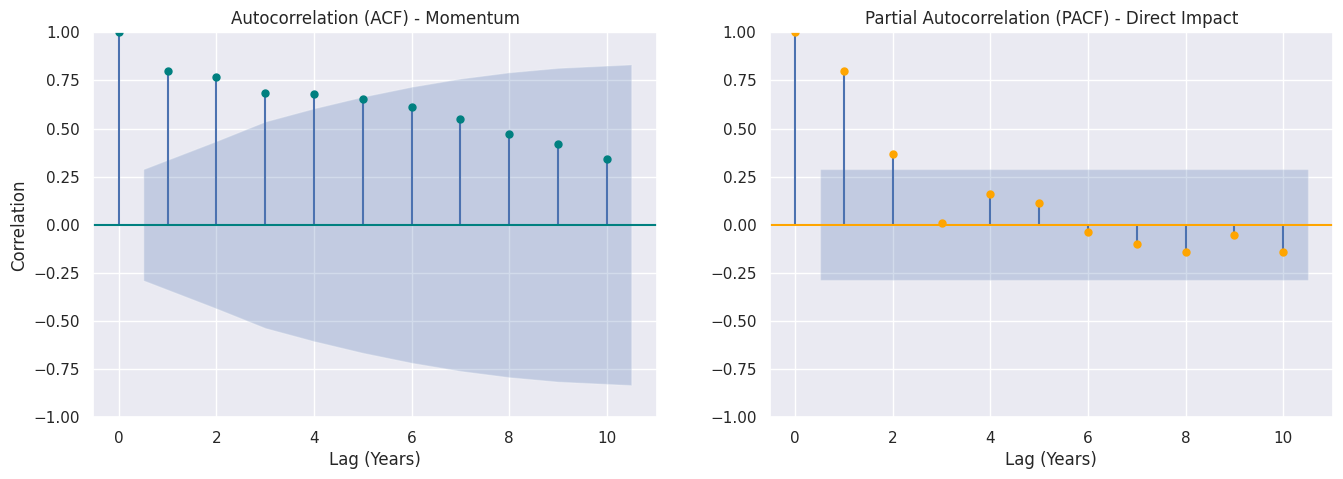

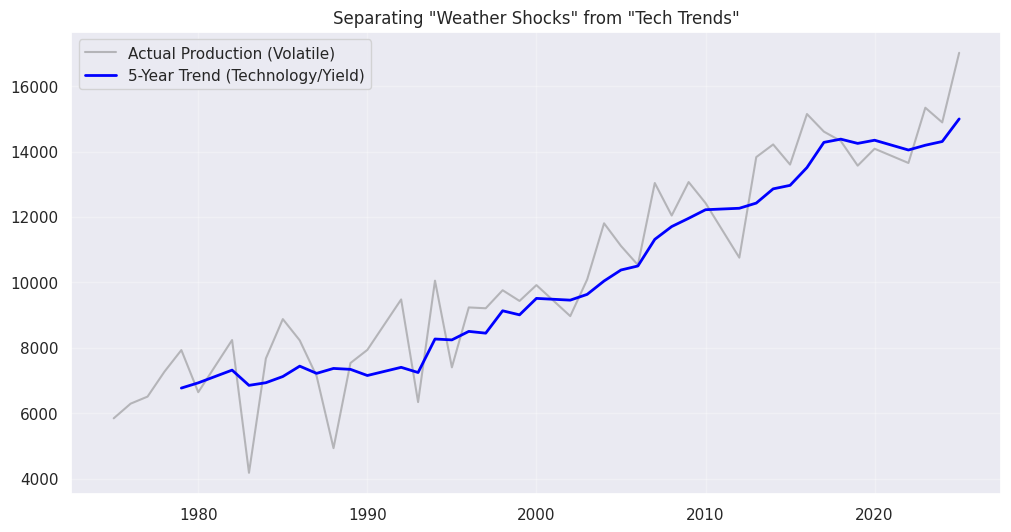

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

print("\n--- Step 3: Market Memory Analysis (ACF/PACF) ---")

# Setup the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ACF Plot (Total Correlation)
# "How much does the past influence the future?"
plot_acf(df['production'], lags=10, ax=axes[0], color='teal')
axes[0].set_title('Autocorrelation (ACF) - Momentum')
axes[0].set_xlabel('Lag (Years)')
axes[0].set_ylabel('Correlation')

# 2. PACF Plot (Direct Influence)
# "Does 2 years ago matter, once we account for 1 year ago?"
plot_pacf(df['production'], lags=10, ax=axes[1], color='orange')
axes[1].set_title('Partial Autocorrelation (PACF) - Direct Impact')
axes[1].set_xlabel('Lag (Years)')

plt.show()

# 3. Trend Analysis (Tech vs Weather)
# We use a 5-year rolling average to smooth out weather shocks
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['production'], label='Actual Production (Volatile)', color='gray', alpha=0.5)
plt.plot(df.index, df['production'].rolling(window=5).mean(), label='5-Year Trend (Technology/Yield)', color='blue', linewidth=2)
plt.title('Separating "Weather Shocks" from "Tech Trends"')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##  LEAD-LAG & ANOMALY DETECTION


--- Final Analysis: Timing & Shocks ---


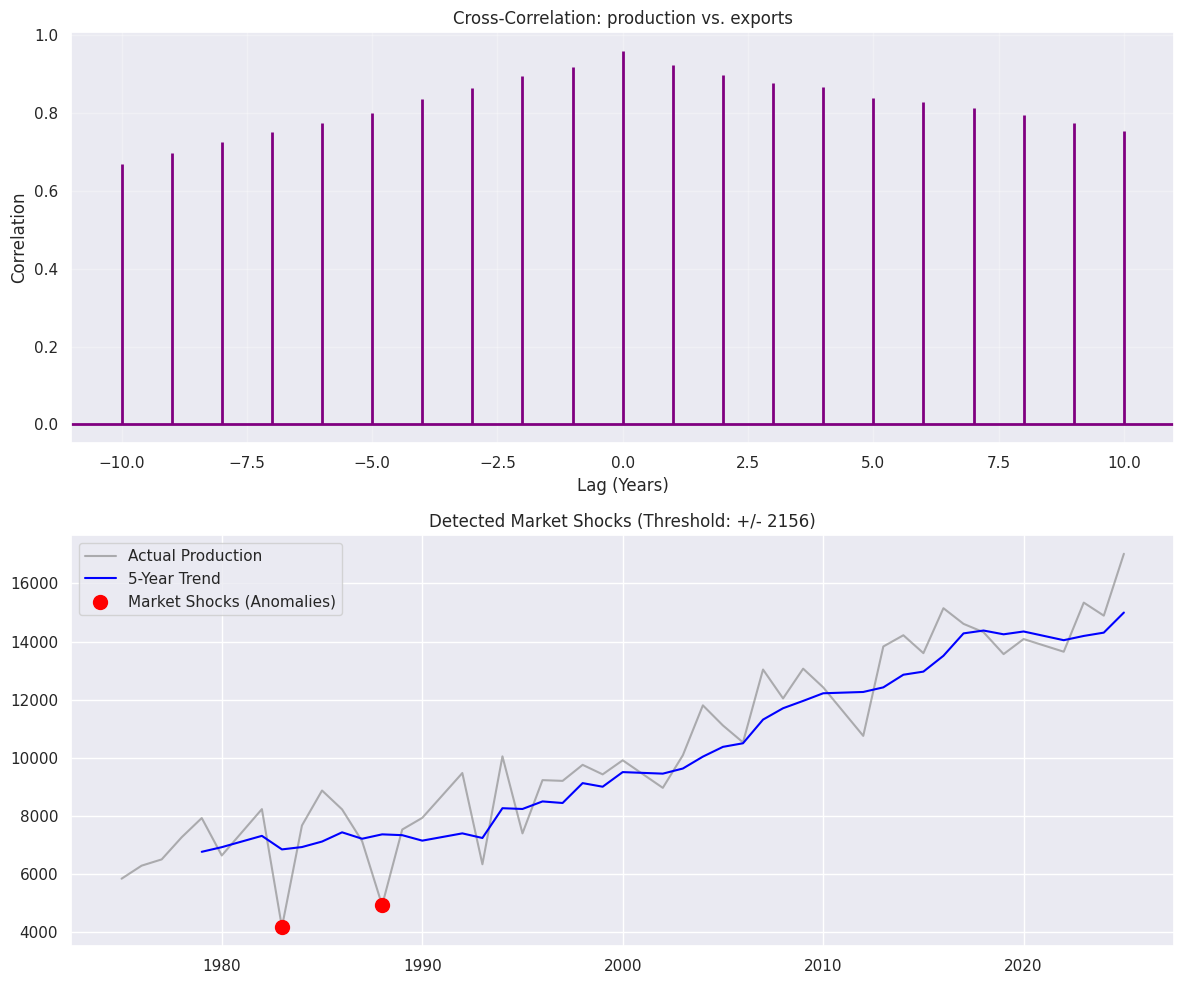


⚠️ Detected 2 Major Market Shocks at years:
[1983, 1988]


In [29]:
print("\n--- Final Analysis: Timing & Shocks ---")

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 1. CROSS-CORRELATION (Who leads whom?)
# We test if Exports 'predict' Production (or vice versa)
# Negative lag = Exports lead Production. Positive lag = Production leads Exports.
axes[0].xcorr(df['production'], df['exports'], maxlags=10, usevlines=True, normed=True, lw=2, color='purple')
axes[0].set_title('Cross-Correlation: production vs. exports')
axes[0].set_xlabel('Lag (Years)')
axes[0].set_ylabel('Correlation')
axes[0].grid(True, alpha=0.3)

# 2. ANOMALY DETECTION (Finding Droughts/Shocks)
# We define an "Anomaly" as any year where production deviated
# significantly (2 standard deviations) from the 5-year trend.
rolling_mean = df['production'].rolling(window=5).mean()
residuals = df['production'] - rolling_mean
threshold = 2 * residuals.std()

# Identify the years
anomalies = df[abs(residuals) > threshold]

# Plot
axes[1].plot(df.index, df['production'], label='Actual Production', color='gray', alpha=0.6)
axes[1].plot(df.index, rolling_mean, label='5-Year Trend', color='blue')
axes[1].scatter(anomalies.index, anomalies['production'], color='red', s=100, label='Market Shocks (Anomalies)', zorder=5)
axes[1].set_title(f'Detected Market Shocks (Threshold: +/- {threshold:.0f})')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\n⚠️ Detected {len(anomalies)} Major Market Shocks at years:")
print(anomalies.index.year.tolist())

## Feature Engineering


--- Feature Engineering ---
New Features Created:
            Stocks_to_Use_Ratio  Net_Exports  Production_Lag1
Date                                                         
2020-01-01             0.101741     2722.704        13568.306
2022-01-01             0.112936     1623.232        14086.699
2023-01-01             0.138731     2226.407        13650.531
2024-01-01             0.126457     2836.607        15340.520
2025-01-01             0.169084     3175.000        14891.756


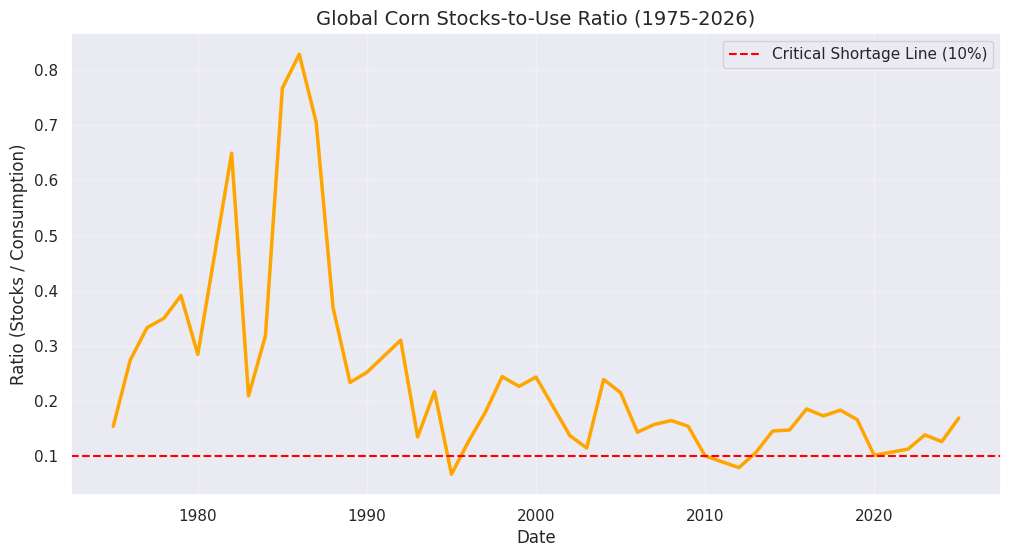

In [24]:
print("\n--- Feature Engineering ---")

# 1. Stocks-to-Use Ratio (The "Price Driver")
# Formula: Ending Stocks / Domestic Consumption
# Note: Adjust column names if yours are slightly different (e.g., 'Total_Use')
df['Stocks_to_Use_Ratio'] = df['ending_stocks'] / df['total_domestic_use']

# 2. Net Exports (Global Influence)
# Is the world buying or selling?
df['Net_Exports'] = df['exports'] - df['imports']

# 3. Lag Features (The "Rear-View Mirror")
# To predict 2026, the model needs to know what happened in 2025.
df['Production_Lag1'] = df['production'].shift(1)  # Last year's production
df['Consumption_Lag1'] = df['total_domestic_use'].shift(1)

# 4. Rolling Volatility (Risk)
# How unstable was the market over the last 5 years?
df['Production_Volatility_5Y'] = df['production'].rolling(window=5).std()

print("New Features Created:")
print(df[['Stocks_to_Use_Ratio', 'Net_Exports', 'Production_Lag1']].tail())

# Visualization: The Golden Ratio
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Stocks_to_Use_Ratio', color='orange', linewidth=2.5)
plt.axhline(0.10, color='red', linestyle='--', label='Critical Shortage Line (10%)')
plt.title('Global Corn Stocks-to-Use Ratio (1975-2026)', fontsize=14)
plt.ylabel('Ratio (Stocks / Consumption)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

--- Final Prep: Validation Setup ---
Data ready for ML. Shape: (42, 17)
Training Range: 1979 - 2015 (33 years)
Testing Range:  2016 - 2025 (9 years)

🎯 THE TARGET TO BEAT:
Baseline Mean Absolute Error (MAE): 928 tonnes
(If your ML model's error is higher than this number, the model is failing.)


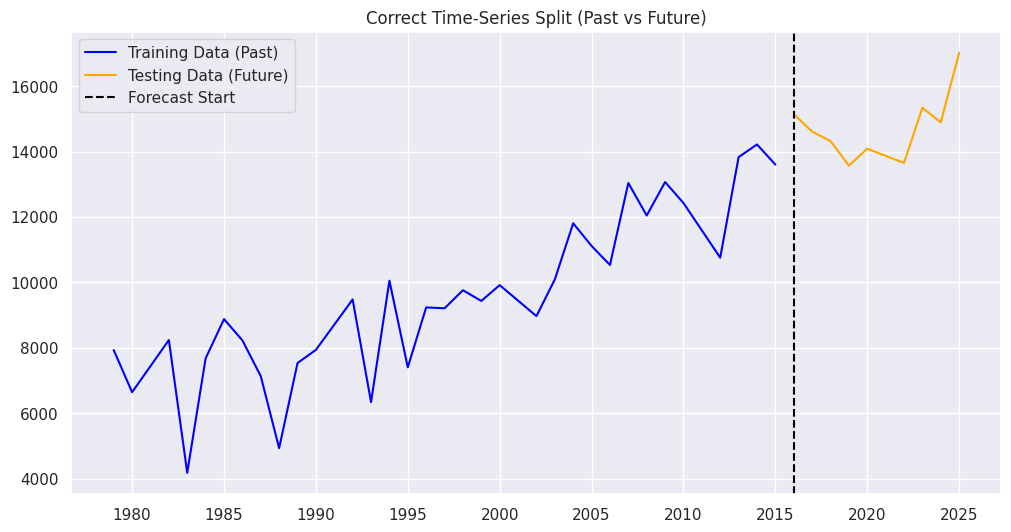

In [31]:
from sklearn.metrics import mean_absolute_error

print("--- Final Prep: Validation Setup ---")

# 1. DROP NANS
# Creating lags (shift) created empty rows at the start. We must remove them.
df_ml = df.dropna().copy()
print(f"Data ready for ML. Shape: {df_ml.shape}")

# 2. TIME-BASED SPLIT (The "No Cheating" Rule)
# We will use the last 20% of years for testing (approx 10 years)
split_point = int(len(df_ml) * 0.80)

train = df_ml.iloc[:split_point]
test = df_ml.iloc[split_point:]

print(f"Training Range: {train.index.year.min()} - {train.index.year.max()} ({len(train)} years)")
print(f"Testing Range:  {test.index.year.min()} - {test.index.year.max()} ({len(test)} years)")

# 3. ESTABLISH BASELINE (The Score to Beat)
# The "Naive Forecast": Assume next year's production will be exactly the same as this year's.
# We compare the "Test Set Actuals" vs "The Previous Year's Value"
y_test_actual = test['production'] # Corrected column name
y_test_naive_pred = test['Production_Lag1'] # Predicted = Last Year's Value

baseline_mae = mean_absolute_error(y_test_actual, y_test_naive_pred)

print(f"\n🎯 THE TARGET TO BEAT:")
print(f"Baseline Mean Absolute Error (MAE): {baseline_mae:,.0f} tonnes")
print("(If your ML model's error is higher than this number, the model is failing.)")

# Visualizing the Split
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['production'], label='Training Data (Past)', color='blue')
plt.plot(test.index, test['production'], label='Testing Data (Future)', color='orange')
plt.axvline(test.index.min(), color='black', linestyle='--', label='Forecast Start')
plt.title('Correct Time-Series Split (Past vs Future)')
plt.legend()
plt.show()

# Univariate Analysis

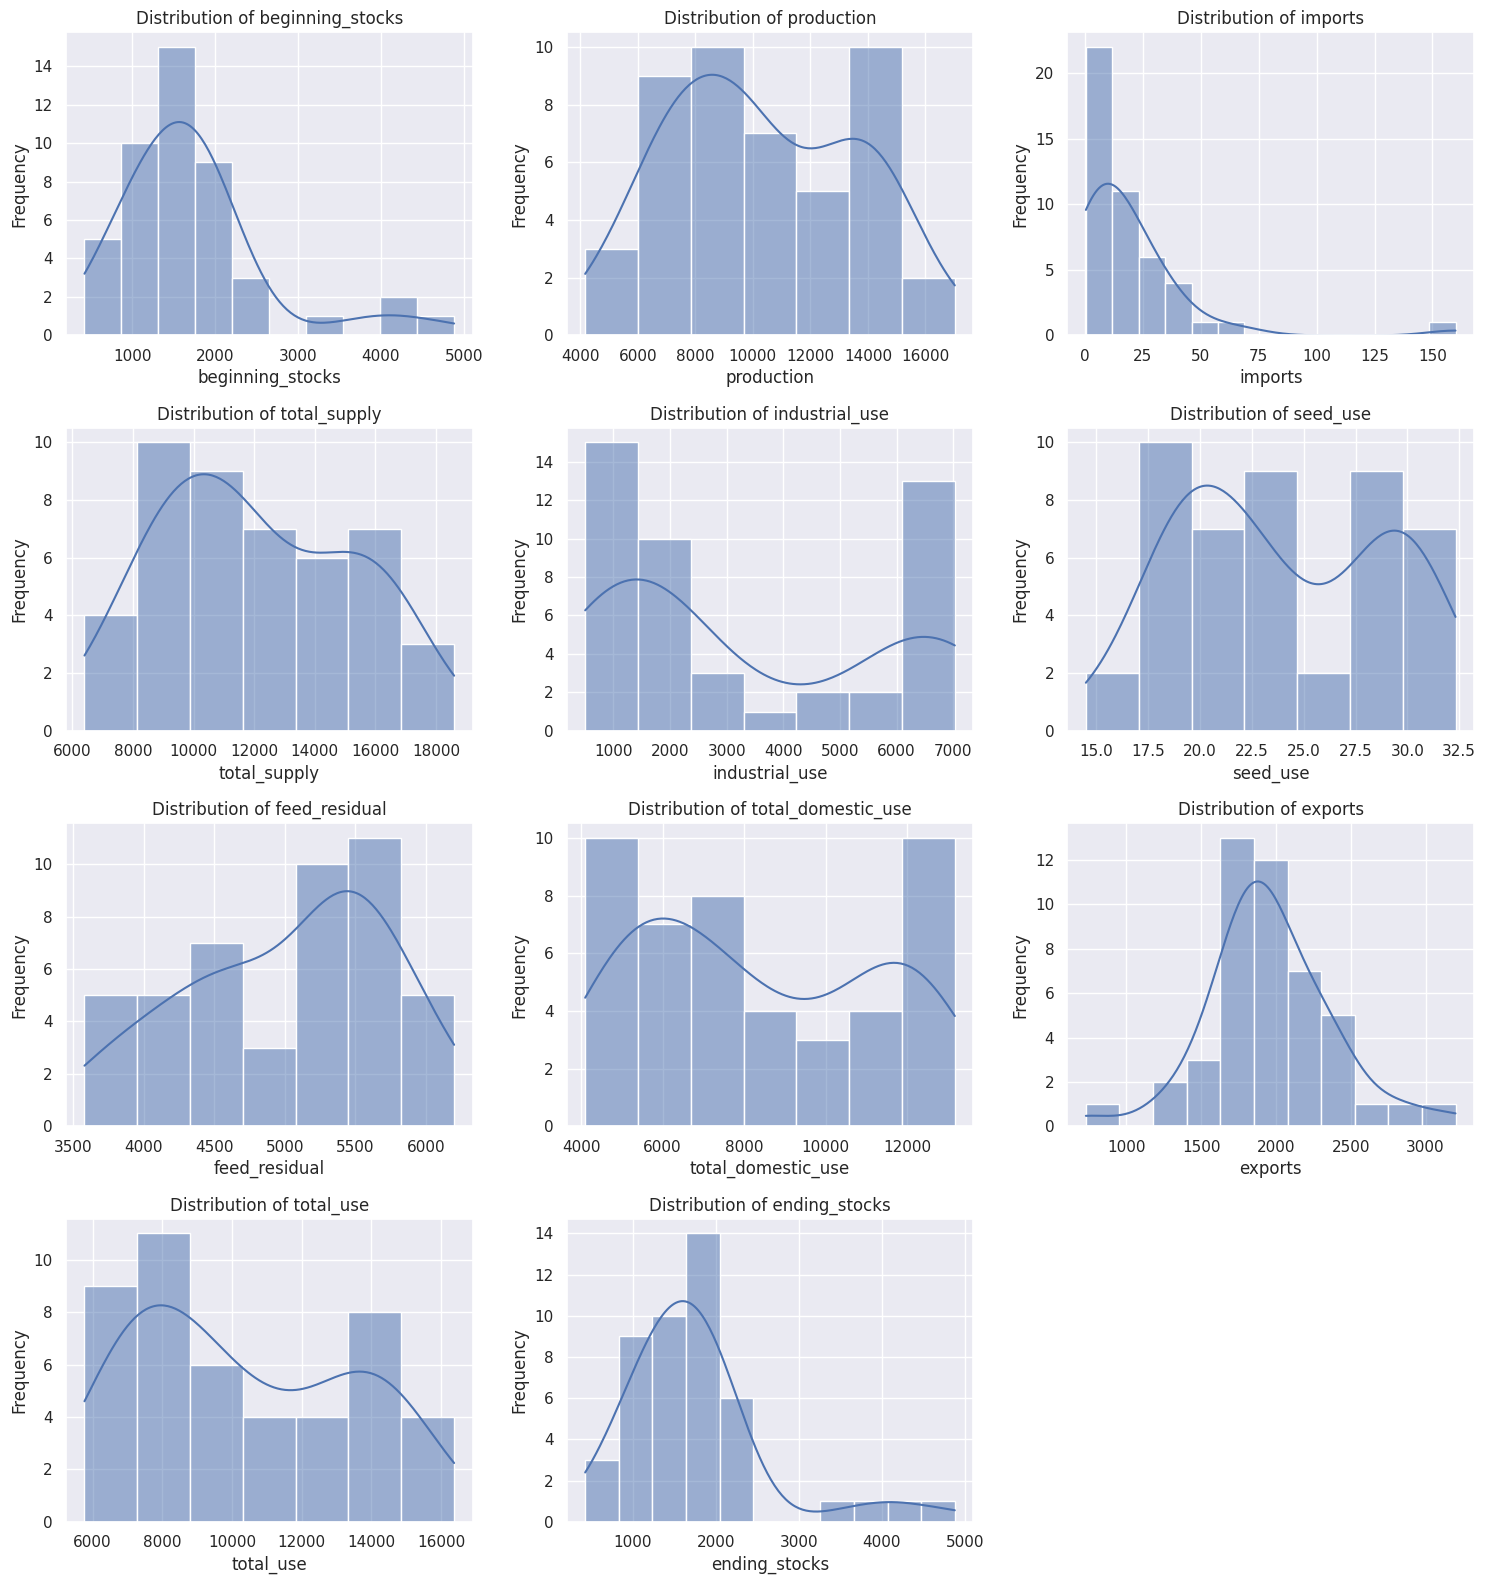

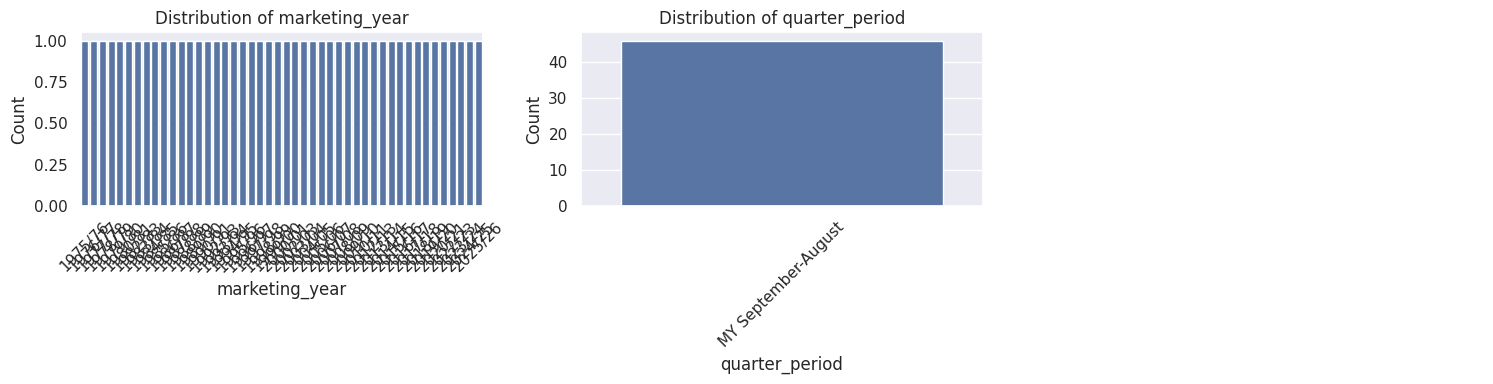

--- Categorical Value Counts ---

Value counts for marketing_year:
marketing_year
1975/76    1
1976/77    1
1977/78    1
1978/79    1
1979/80    1
1980/81    1
1982/83    1
1983/84    1
1984/85    1
1985/86    1
1986/87    1
1987/88    1
1988/89    1
1989/90    1
1990/91    1
1992/93    1
1993/94    1
1994/95    1
1995/96    1
1996/97    1
1997/98    1
1998/99    1
1999/00    1
2000/01    1
2002/03    1
2003/04    1
2004/05    1
2005/06    1
2006/07    1
2007/08    1
2008/09    1
2009/10    1
2010/11    1
2012/13    1
2013/14    1
2014/15    1
2015/16    1
2016/17    1
2017/18    1
2018/19    1
2019/20    1
2020/21    1
2022/23    1
2023/24    1
2024/25    1
2025/26    1
Name: count, dtype: int64

Value counts for quarter_period:
quarter_period
MY September-August    46
Name: count, dtype: int64


In [15]:
import math
# --- 1. Numerical Columns (Histograms in a Grid) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    # Define grid size
    num_plots = len(numerical_cols)
    num_cols = 3  # You can change this to 2 or 4 if preferred
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate and plot
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hidding any unused subplots (if total plots < grid cells)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


# --- 2. Categorical Columns (Countplots in a Grid) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    # Define grid size
    num_plots = len(categorical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterate and plot
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # --- 3. Value Counts (Text Output) ---
    print("--- Categorical Value Counts ---")
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns found.")

# Bivariate Analysis

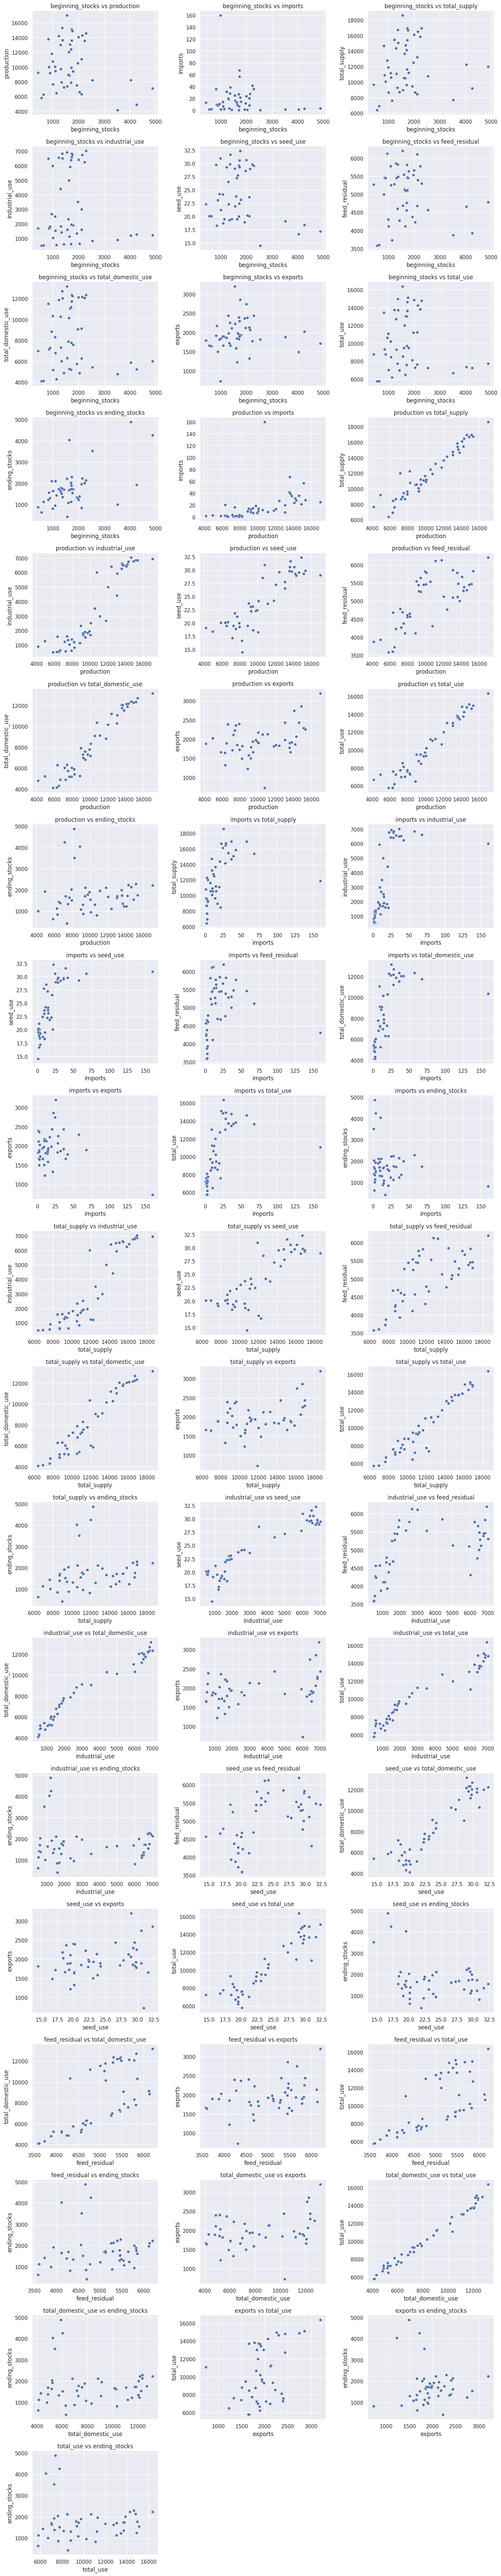

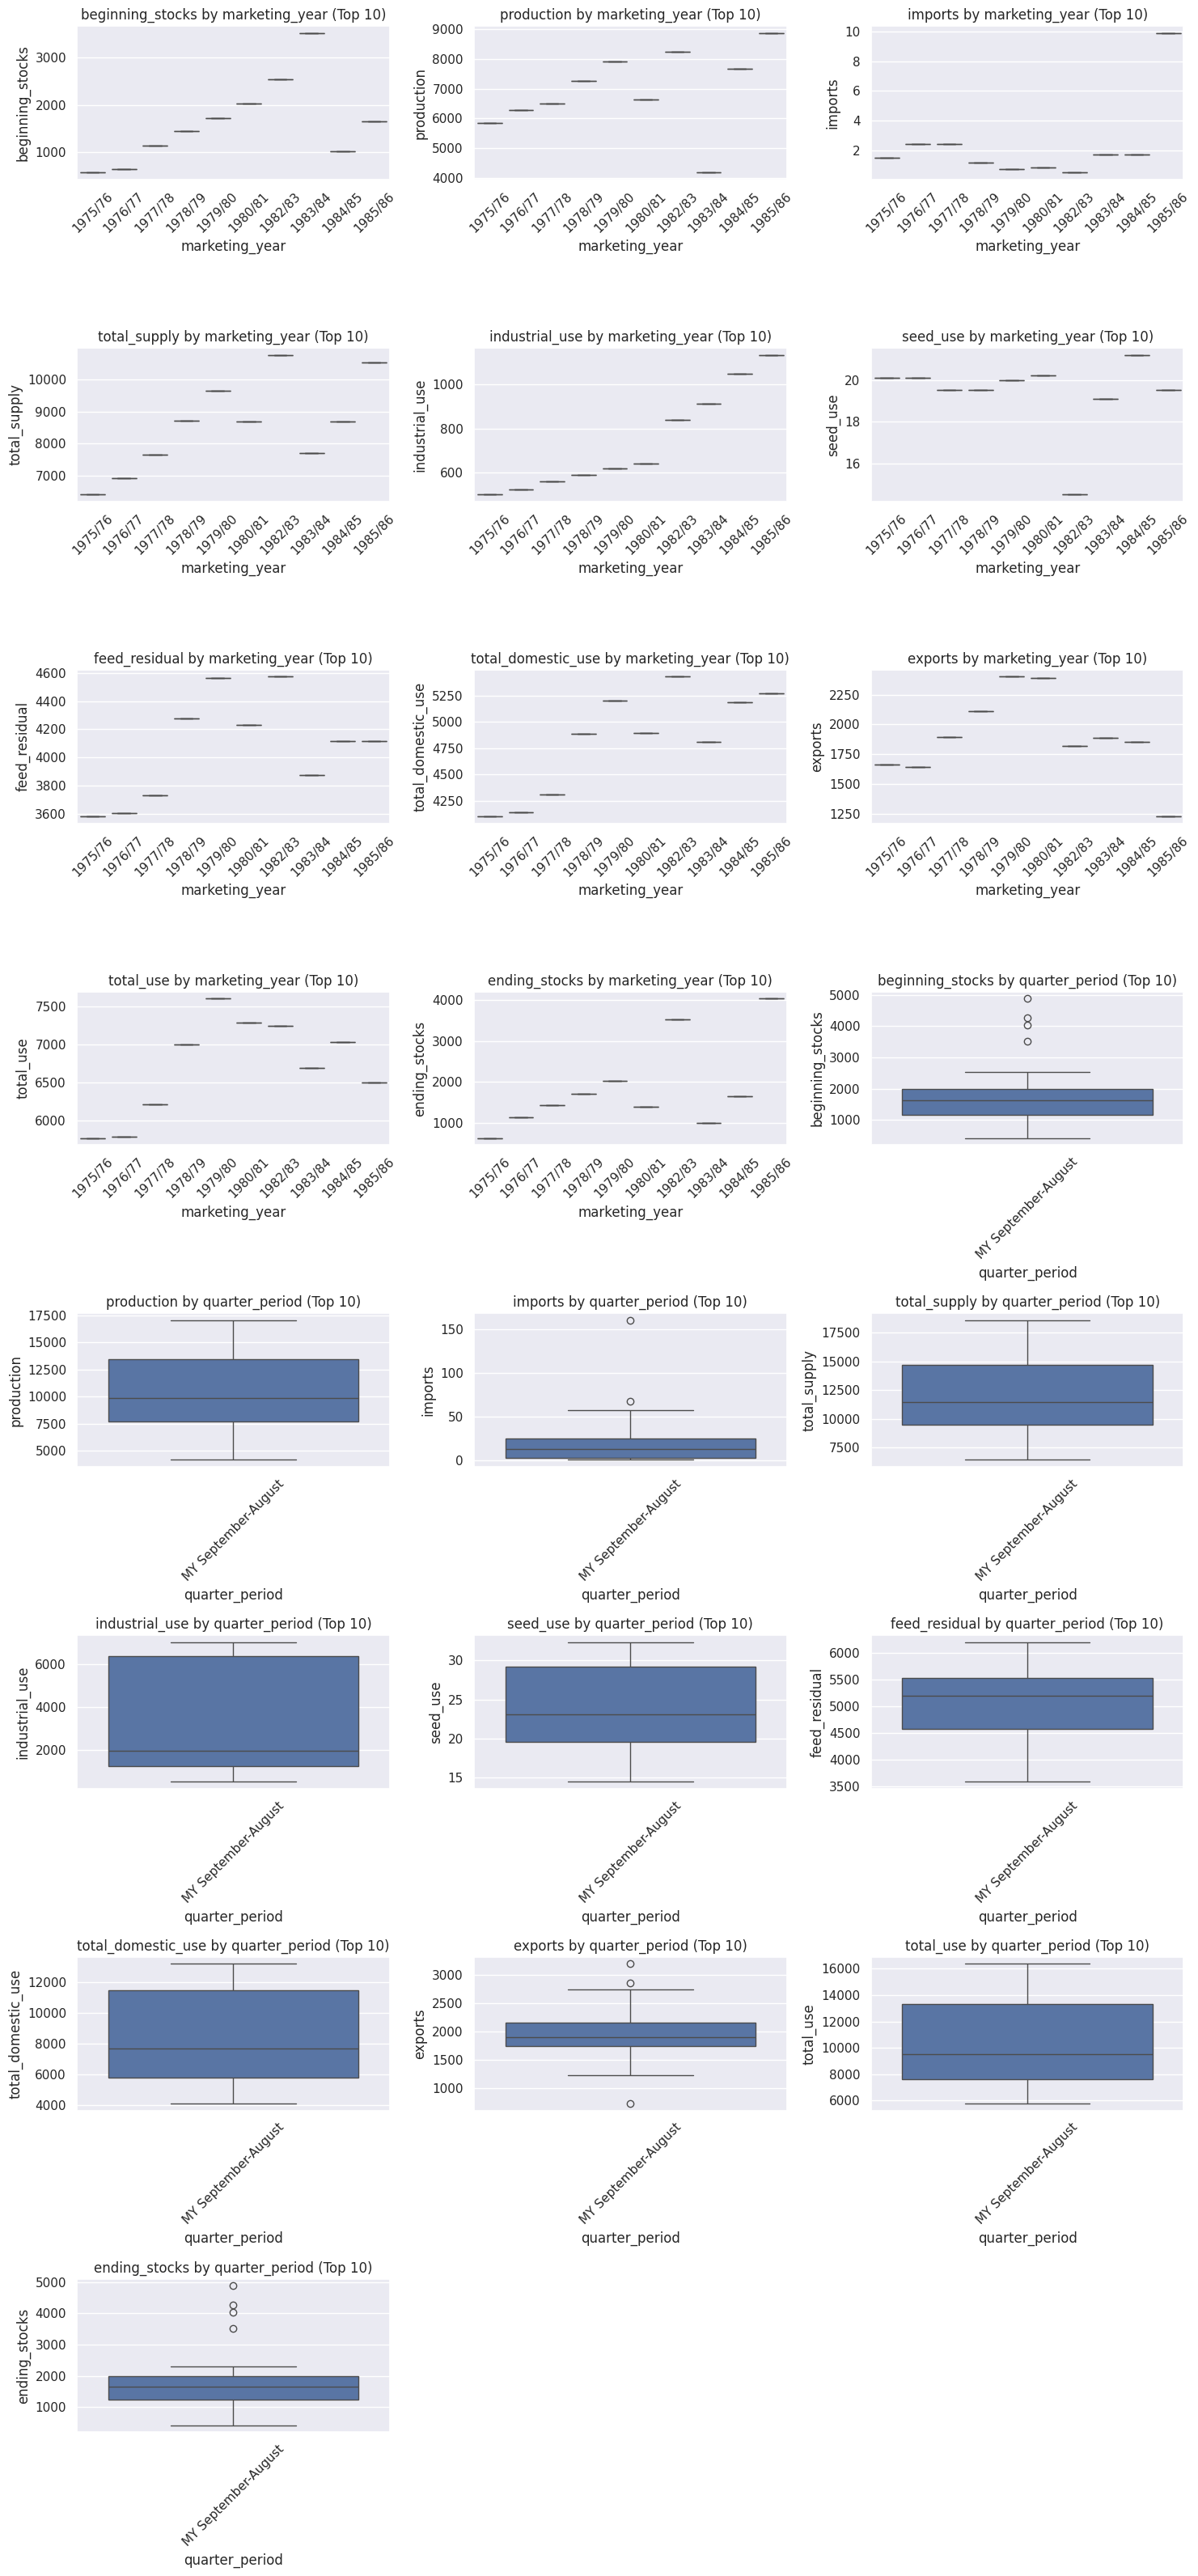

In [16]:
import itertools

# --- 1. Numerical-Numerical Relationships (Scatter Plots) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all unique pairs of numerical columns
num_pairs = list(itertools.combinations(numerical_cols, 2))

if len(num_pairs) > 0:
    # Define grid size
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Flatten axes for easy iteration.
    # Handle edge case where there is only 1 plot (axes is not an array)
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (col1, col2) in enumerate(num_pairs):
        sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
        axes[i].set_title(f'{col1} vs {col2}')
        axes[i].set_xlabel(col1)
        axes[i].set_ylabel(col2)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plots.")


# --- 2. Categorical-Numerical Relationships (Box Plots) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all pairs of (Categorical, Numerical)
cat_num_pairs = list(itertools.product(categorical_cols, numerical_cols))

if len(cat_num_pairs) > 0:
    # Define grid size
    num_plots = len(cat_num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (cat_col, num_col) in enumerate(cat_num_pairs):
        # 1. Get top 10 categories based on frequency
        top_categories = df[cat_col].value_counts().nlargest(10).index.tolist()

        # 2. Filter data: Keep only top categories AND ensure numerical column is not NaN
        filtered_df = df[df[cat_col].isin(top_categories) & df[num_col].notnull()]

        # 3. Update 'order' to only include categories that exist in the filtered data
        # This prevents the ValueError where a category in 'order' has no data to plot
        valid_categories = [cat for cat in top_categories if cat in filtered_df[cat_col].unique()]

        if valid_categories:
            sns.boxplot(data=filtered_df, x=cat_col, y=num_col, ax=axes[i], order=valid_categories)
            axes[i].set_title(f'{num_col} by {cat_col} (Top 10)')
            axes[i].set_xlabel(cat_col)
            axes[i].set_ylabel(num_col)
            axes[i].tick_params(axis='x', rotation=45)
        else:
             axes[i].text(0.5, 0.5, "No valid data", ha='center', va='center')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical-numerical pairs found.")

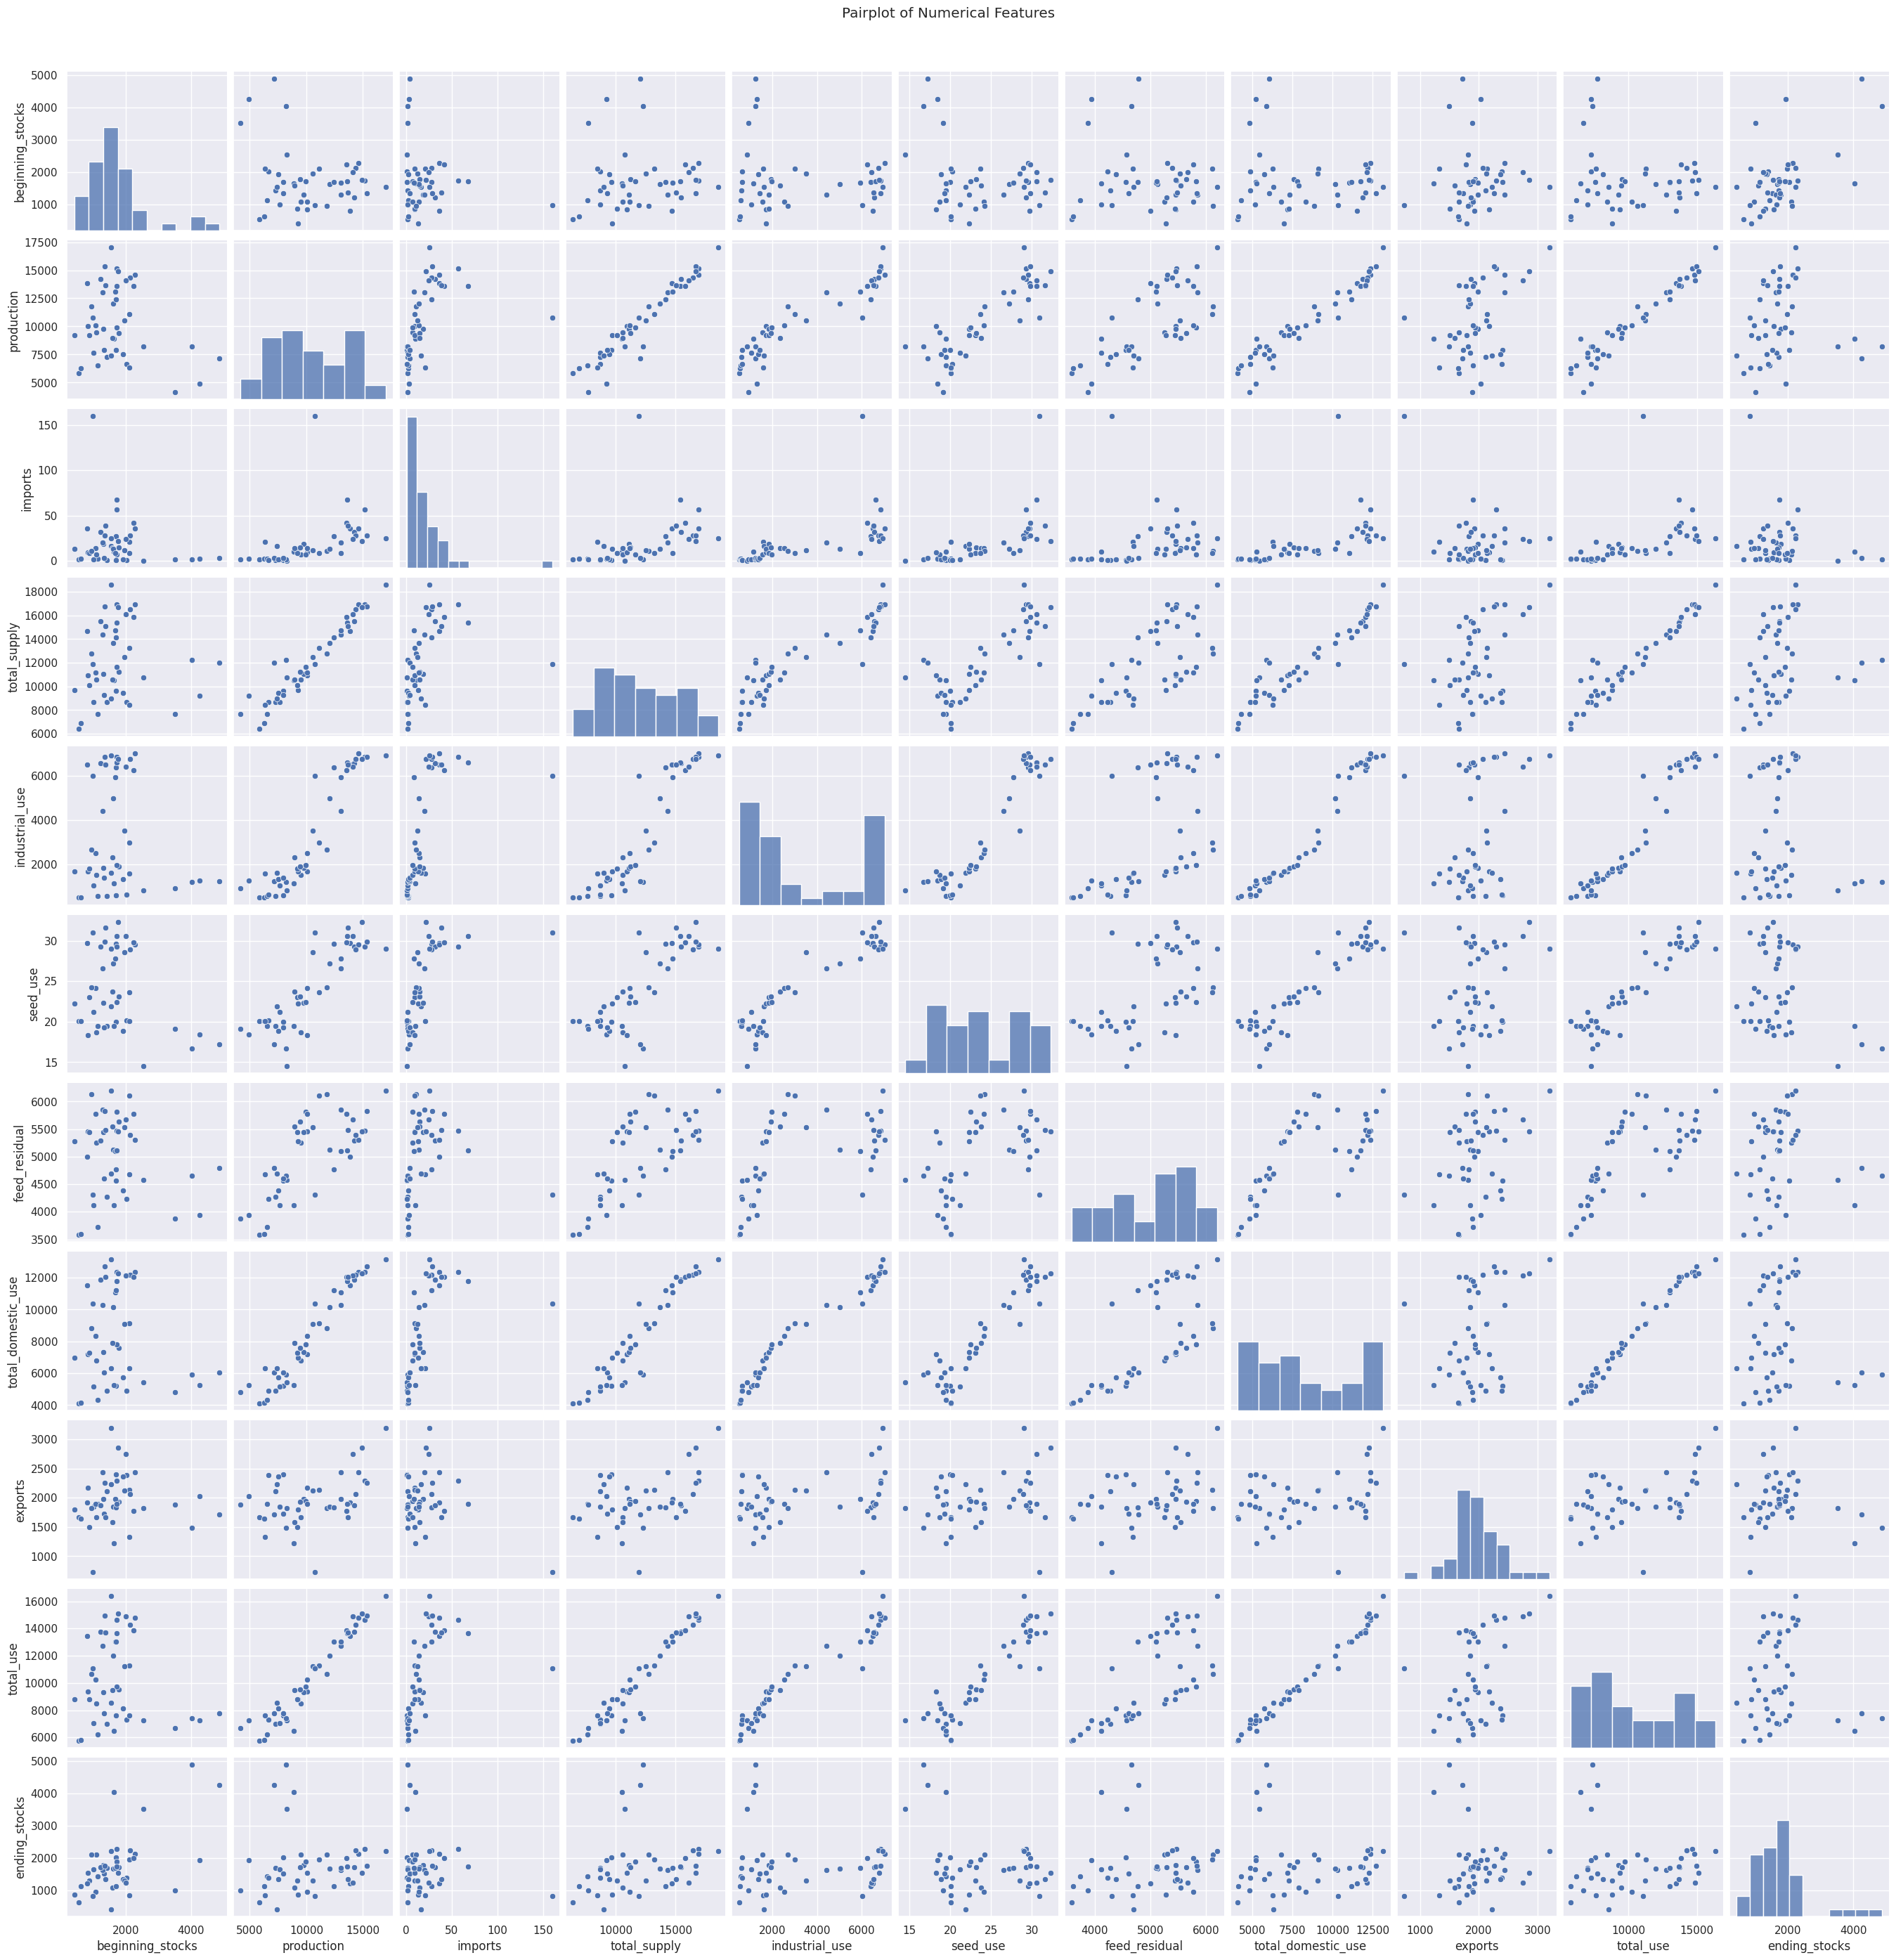

In [17]:
sns.pairplot(df.select_dtypes(include = np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

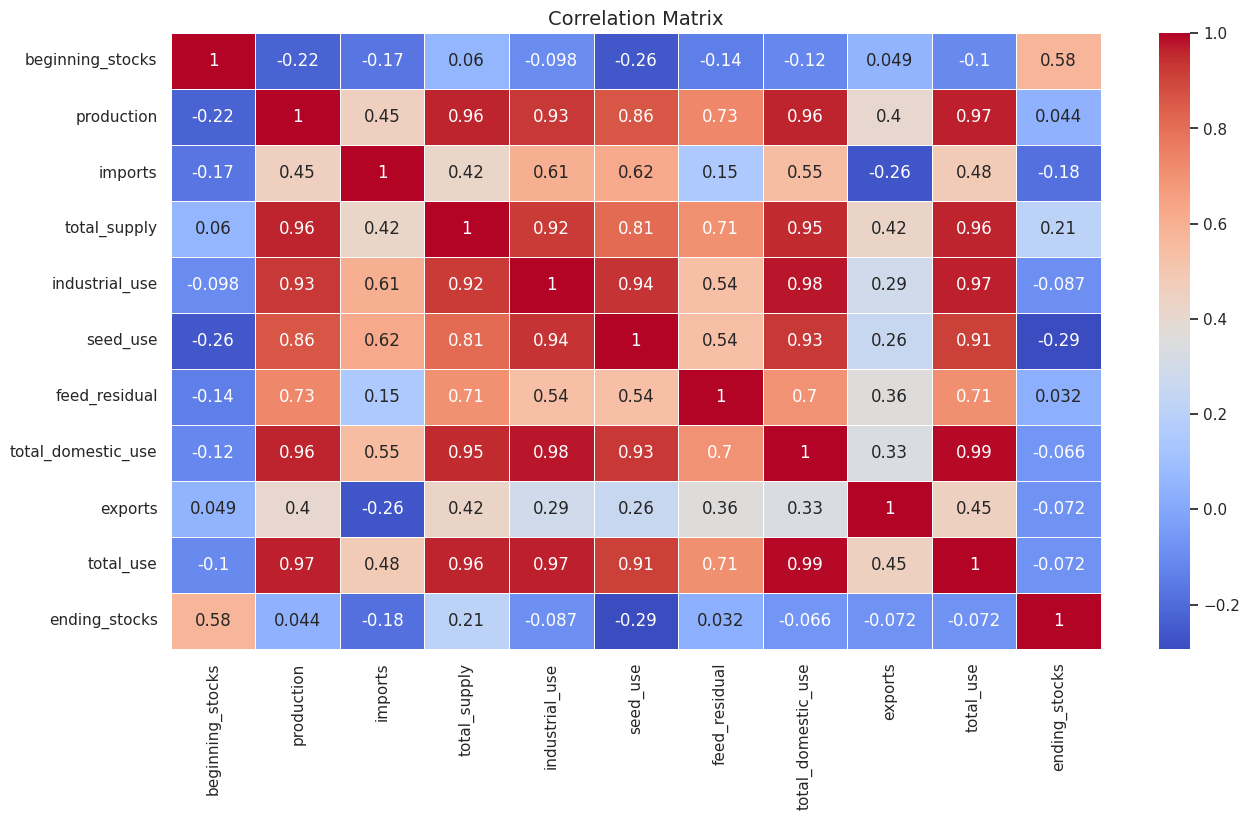

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Machine Learning `XGboost`


--- Starting AI Training (XGBoost) ---
Training with 5 features: ['Production_Lag1', 'Consumption_Lag1', 'Stocks_to_Use_Ratio', 'Net_Exports', 'Production_Volatility_5Y']
[0]	validation_0-rmse:2462.49321	validation_1-rmse:5249.32199
[100]	validation_0-rmse:1215.64952	validation_1-rmse:4174.15198
[200]	validation_0-rmse:636.66630	validation_1-rmse:3569.11248
[300]	validation_0-rmse:347.65417	validation_1-rmse:3207.26439
[400]	validation_0-rmse:200.96335	validation_1-rmse:3106.43252
[500]	validation_0-rmse:119.67993	validation_1-rmse:3001.85521
[600]	validation_0-rmse:72.96561	validation_1-rmse:2953.72933
[700]	validation_0-rmse:46.55348	validation_1-rmse:2928.98816
[800]	validation_0-rmse:29.28778	validation_1-rmse:2915.47280
[900]	validation_0-rmse:18.60517	validation_1-rmse:2897.92296
[999]	validation_0-rmse:12.68925	validation_1-rmse:2886.54206

---------------------------------------------------
🎯 MODEL RESULTS:
Baseline Error (Simple Guess): 928
AI Model Error (XGBoost):      2,80

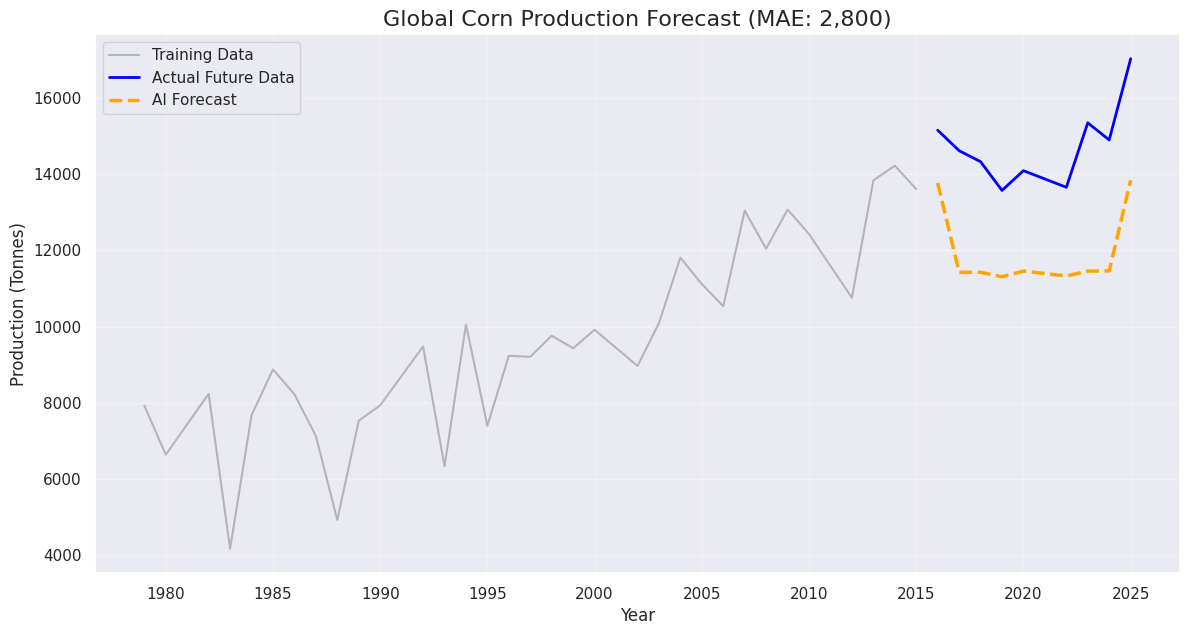

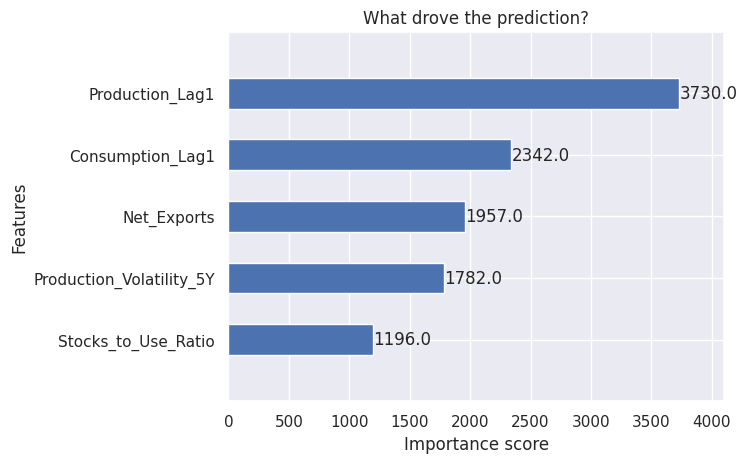

In [34]:
# ==========================================
# STEP 5: MACHINE LEARNING (XGBoost)
# ==========================================
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("\n--- Starting AI Training (XGBoost) ---")

# 1. DEFINE FEATURES & TARGET
# We use the features we engineered earlier
features = ['Production_Lag1', 'Consumption_Lag1', 'Stocks_to_Use_Ratio',
            'Net_Exports', 'Production_Volatility_5Y']
target = 'production'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print(f"Training with {len(features)} features: {features}")

# 2. INITIALIZE & TRAIN MODEL
# n_estimators=1000: Give it 1000 chances to learn.
# learning_rate=0.01: Learn slowly to avoid overreacting to noise.
# max_depth=4: Keep trees simple to prevent overfitting.
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    objective='reg:squarederror',
    early_stopping_rounds=50,
    n_jobs=-1,
    random_state=42
)

# Train the model
# eval_set tells the model to check its work on the Test data as it learns
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100  # Print progress every 100 rounds
)

# 3. EVALUATE PERFORMANCE
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds)) # Corrected RMSE calculation

print(f"\n---------------------------------------------------")
print(f"🎯 MODEL RESULTS:")
print(f"Baseline Error (Simple Guess): {baseline_mae:,.0f}")
print(f"AI Model Error (XGBoost):      {mae:,.0f}")
print(f"---------------------------------------------------")

if mae < baseline_mae:
    print(f"✅ SUCCESS: The AI beat the baseline by {baseline_mae - mae:,.0f} tonnes!")
else:
    print(f"❌ FAIL: The AI is worse than guessing. Needs tuning.")

# 4. VISUALIZE PREDICTIONS
plt.figure(figsize=(14, 7))
plt.plot(train.index, train[target], label='Training Data', color='gray', alpha=0.5)
plt.plot(test.index, test[target], label='Actual Future Data', color='blue', linewidth=2)
plt.plot(test.index, preds, label='AI Forecast', color='orange', linestyle='--', linewidth=2.5)

plt.title(f'Global Corn Production Forecast (MAE: {mae:,.0f})', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. FEATURE IMPORTANCE (The "Why")
xgb.plot_importance(model, max_num_features=10, height=0.5, title='What drove the prediction?')
plt.show()

# Thank You